<div style="display:Fill;
           border: 1px outset orange;
           border-radius: 50px 10px 50px;
           background-color:#C1FFC1">

<h1 style="color:black;
          font-size:30px;
          font-family:sans-serif;
          letter-spacing:1.0px;
          text-align:center">VEHICLE INSURANCE CLAIM SETTLEMENT 🚗</h1>
</div>

# <center><span style="color:#006400;">Table Of Contents 📚</span></center>
<a id="toc"></a>
- [1. Libraries and Dataset Importing](#1)
- [2. Features and Label Description ](#2)
- [3. Exploratory Data Analysis (EDA)](#3)
    - [3.1 Data Exploration](#3.1)
    - [3.2 EDA of Continuous Variables](#3.2)
    - [3.3 EDA of Categorical Variables](#3.3)
    - [3.4 Interaction with Target Variable](#3.4)
- [4. Data Preprocessing](#4)
    - [4.2 DATA IMPUTATION](#4.1)
- [5. FEATURE ENGINEERING](#5)
- [6. DATA TRANSFORMATION USING ONE HOT ENCODING](#6)
- [7. CORRELATION MATRIX](#7)
- [8. FEATURE EXTRACTION](#8)
    - [8.1 INTRINSIC METHOD - FEATURE IMPORTANCE THROUGH RANDOM FOREST](#8.1)
    - [8.2 WRAPPER METHOD](#8.2)
- [9. FEATURE SELECTION](#9)
- [10. HYPERPARAMETER TUNING](#10)
- [11. MODEL EVALUATION](#11)
- [12. FINAL MODEL CREATION AND EXPORTING RESULTS](#12)

<a id="1"></a>

# <div class="alert alert-success" ><font color=orange>Libraries and Dataset Importing ✅</font></div>

In [564]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import optuna
import time
import bz2
import warnings
warnings.filterwarnings('ignore')

In [496]:
data = pd.read_csv(r'C:\Users\trash\Downloads\insurance_claim_document.csv')

In [497]:
data.head()

ID    AGE  GENDER DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0  816393  40-64  female             20-29y   university   middle class   
1  251762  26-39    male             20-29y  high school   middle class   
2  481952  40-64    male             20-29y         none   middle class   
3    3506  40-64    male             20-29y  high school    upper class   
4  498013  40-64  female             20-29y         none  working class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
0      0.638050                0.0   after 2015      0.0       0.0   
1      0.475741                1.0  before 2015      1.0       0.0   
2      0.839817                1.0  before 2015      1.0       1.0   
3      0.682527                1.0  before 2015      0.0       1.0   
4      0.572184                1.0   after 2015      1.0       1.0   

   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0        37379         11000.0                    0     0               0   
1        10238          9000.0                    0     0               0   
2        10238         12000.0                    0     0               0   
3        92099          6000.0                    1     0               0   
4        32122         15000.0                    0     0               1   

   OUTCOME TYPE_OF_VEHICLE  
0      0.0      Sports Car  
1      1.0       HatchBack  
2      1.0           Sedan  
3      1.0           Sedan  
4      0.0           Sedan

In [498]:
data.shape

(105000, 18)

In [499]:
new_data = data.drop('OUTCOME',axis = 1)

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="2"></a>

# <div class="alert alert-success" ><font color=orange>Features and Label Description ✅</font></div>
* ID  -- This is ID of a customer which is owner of the car which is here for claiming the Insurance on their vehicle.
* AGE -- Age of customer ( Categorized in form of 4 categories )
* GENDER  --  Gender of customer.
* DRIVING_EXPERIENCE -- Driving Experience of the cutomer's which is crucial in insurance claim authorization.
* EDUCATION -- Education Background of the customer.
* INCOME -- Financial Background of the customer.
* CREDIT_SCORE -- Unique Credit Score of customers which is in the form of decimals ranging between 50 to 960 in which 0 being the lowest and 1000 be the highest.
* VEHICLE_OWNERSHIP -- Binary Data which lets the user know whether the car was owned or not.
* VEHICLE_YEAR -- Lets user know whether the car is manufactured before 2015 or later.
* MARRIED -- Binary Data that lets the user know Marital Status of the customer.
* CHILDREN -- Binary Data that lets the user know in case the customer has children or not.
* POSTAL_CODE -- Unique Postal Code of the areas where the customers reside.
* ANNUAL_MILEAGE -- Customers are categorized on the Annual Mileage they put on their vehicle which is put under 20 categories.
* SPEEDING_VIOLATIONS -- Speeding Violations lets the user know the Speeding Violations the customer had in their driving experience ranging from minimum of None to maximum of 20 Speeding Violations.
* DUIS(Driving Under Influence) -- DUIS records the number of occassions the customer drove vehicle under drugs/alcohol influence which is categorized in 7 ways.
* PAST_ACCIDENTS -- Whether the customer had past accidents and that too the number of times the accidents happened with that customer are counted in this feature.
* TYPE_OF_VEHICLE -- It lets the user know the shape of vehicle whether its hatchback, sedan, SUV or Sports Car.
* OUTCOME [LABEL] -- This is the Label which tells the outcome of whether the Insurance claim is authentic or not which in-turn helps in judging the future prosperts for Car Insurance Claim.

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="3"></a>
# <div class="alert alert-success" ><font color=orange>Exploratory Data Analysis [EDA] ✅</font></div>

In [500]:
categorical_features = [i for i in new_data.columns if new_data[i].nunique() < 25]
continuous_features = [i for i in new_data.columns if new_data[i].nunique() >= 25]
print("Continuous Features : ",continuous_features)
print()
print("Categorical Features : ",categorical_features)

Continuous Features :  ['ID', 'CREDIT_SCORE', 'POSTAL_CODE']

Categorical Features :  ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'TYPE_OF_VEHICLE']


#### Here we have segregated Data into Continuous( its not same as numeric segregation ) and categorical through the number of unique values in each feature. 

<a id="3.1"></a>

## <font color=teal>Data Exploration</font> 

In [501]:
for i in new_data.columns:
    print(new_data[i].value_counts())

101       127
102        39
103        14
104        12
106        11
         ... 
245726      1
243679      1
151520      1
411617      1
262144      1
Name: ID, Length: 98485, dtype: int64
40-64    33716
65+      32962
26-39    20018
16-25    18304
Name: AGE, dtype: int64
male      65317
female    39683
Name: GENDER, dtype: int64
20-29y    37493
0-9y      33111
10-19y    25101
30y+       9295
Name: DRIVING_EXPERIENCE, dtype: int64
high school    46590
university     31220
none           27190
Name: EDUCATION, dtype: int64
upper class      51271
working class    24454
middle class     14738
poverty          14537
Name: INCOME, dtype: int64
0.884095    2
0.856945    2
0.583765    2
0.812434    2
0.595408    2
           ..
0.265658    1
0.833666    1
0.526671    1
0.563100    1
0.356919    1
Name: CREDIT_SCORE, Length: 104976, dtype: int64
1.0    86839
0.0    18161
Name: VEHICLE_OWNERSHIP, dtype: int64
before 2015    57511
after 2015     47489
Name: VEHICLE_YEAR, dtype: int64
1.0    6

In [502]:
print(new_data[new_data.duplicated()])

Empty DataFrame
Columns: [ID, AGE, GENDER, DRIVING_EXPERIENCE, EDUCATION, INCOME, CREDIT_SCORE, VEHICLE_OWNERSHIP, VEHICLE_YEAR, MARRIED, CHILDREN, POSTAL_CODE, ANNUAL_MILEAGE, SPEEDING_VIOLATIONS, DUIS, PAST_ACCIDENTS, TYPE_OF_VEHICLE]
Index: []


### Cardinality in features 

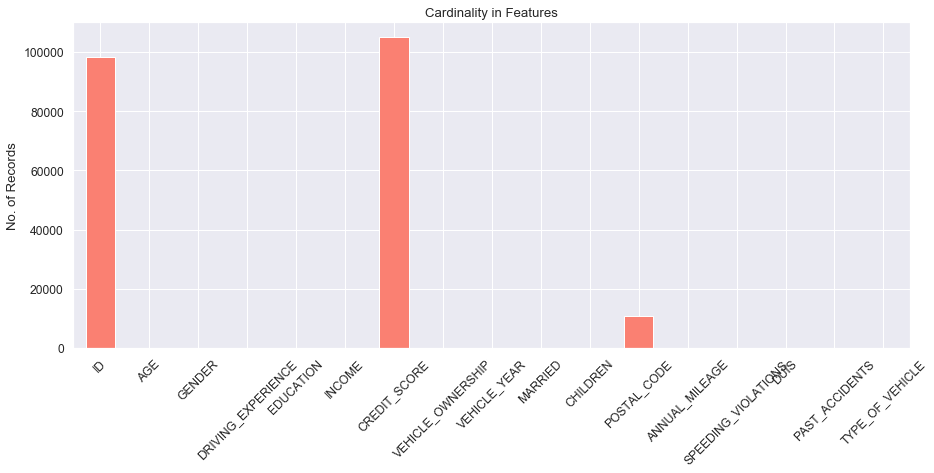

In [503]:
fig = plt.figure(figsize = (15, 6))
new_data.nunique().plot.bar(title="Cardinality in Features",width = 0.6,color = 'salmon')
plt.xticks(rotation = 45)
plt.ylabel("No. of Records")
plt.show()

In [504]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  float64
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [505]:
print(f'\033[94m')
print(new_data.isna().sum().sort_values(ascending = False))


TYPE_OF_VEHICLE        0
VEHICLE_OWNERSHIP      0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_YEAR           0
PAST_ACCIDENTS         0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
ID                     0
dtype: int64


In [506]:
new_data.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

In [507]:
new_data.describe(include=["object", "bool"]).T.sort_values(by='freq',ascending = False)

count unique          top   freq
GENDER              105000      2         male  65317
VEHICLE_YEAR        105000      2  before 2015  57511
INCOME              105000      4  upper class  51271
EDUCATION           105000      3  high school  46590
DRIVING_EXPERIENCE  105000      4       20-29y  37493
TYPE_OF_VEHICLE     105000      4   Sports Car  34592
AGE                 105000      4        40-64  33716

In [508]:
print(f'\033[94mNumber of rows in data                     :   {new_data.shape[0]}')
print(f'\033[94mNumber of columns in data                  :   {new_data.shape[1]}')
print(f'\033[94mTotal No. of rows with missing values data :   {sum(new_data.isna().sum())}')

Number of rows in data                     :   105000
Number of columns in data                  :   17
Total No. of rows with missing values data :   0


#### <div class="alert alert-info" ><font color=red>*Observations 📌*</font></div>
    1. Majority of predictors have more than 2 categories inside each of them.
    2. There are no duplicate data in the dataset.
    3. The Dataset is Balanced i.e of 105000 records around 60000 records did not get their Insurance claim approved and 
       rest got their insurance claim approved.
    4. There is High Cardinality in "ID" and "CREDIT_SCORE" features.
    5. There does not exist any null values in any of the features of this dataset. 
    6. The Male Drivers are almost in 3/5 ratio to that of female drivers.
    7. Dataset contains highest number of upper class people having high school education. 
    8. Drivers used majorily "Sports_Car" as their vehicle and most people of Higher Age having high Driving Experience. 

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="3.2"></a>

## <font color=teal>EDA of Continuous Features</font> 

In [509]:
new_data_number = new_data[continuous_features]

In [510]:
new_data_number.head()

ID  CREDIT_SCORE  POSTAL_CODE
0  816393      0.638050        37379
1  251762      0.475741        10238
2  481952      0.839817        10238
3    3506      0.682527        92099
4  498013      0.572184        32122

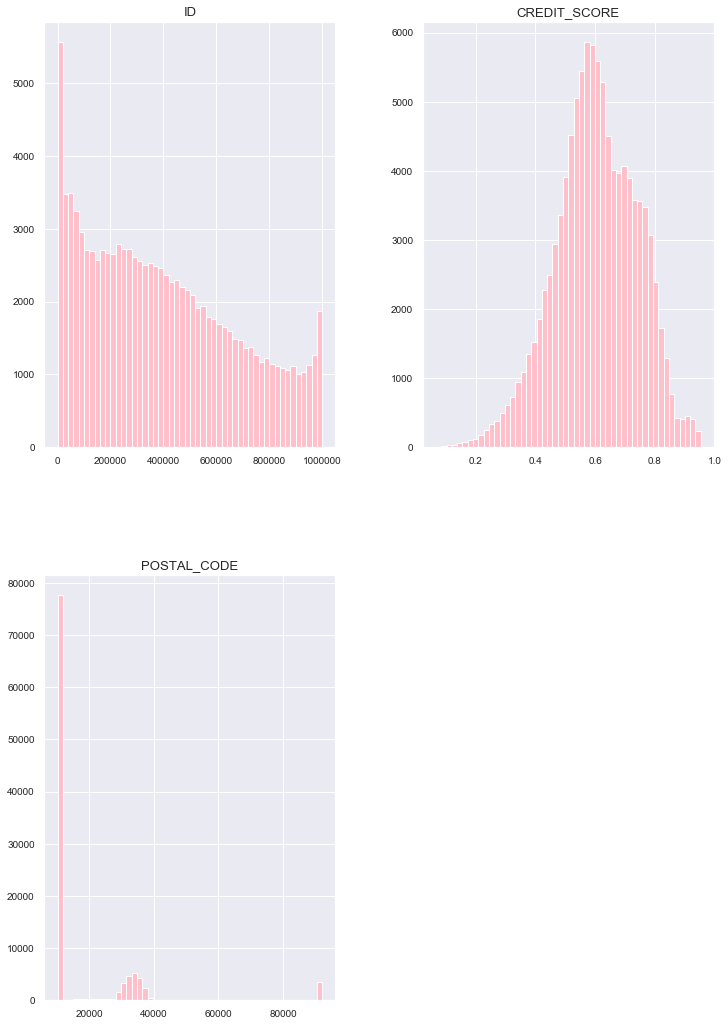

In [511]:
new_data_number.hist(figsize=(12, 18), bins=50, xlabelsize=10, ylabelsize=10,color='pink');

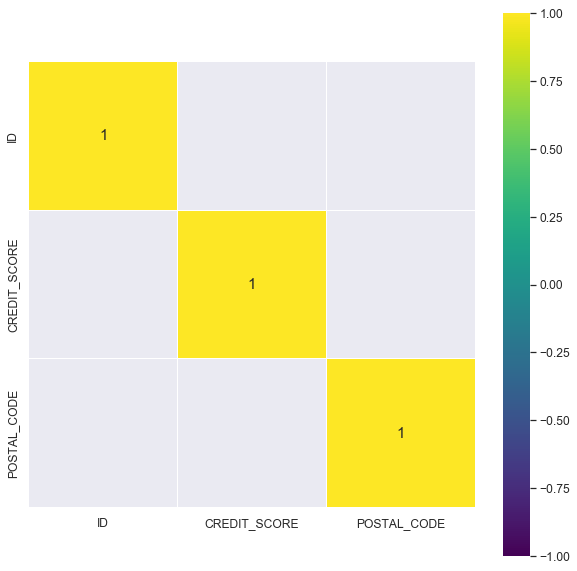

In [512]:
corr = new_data_number.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 15}, square=True);

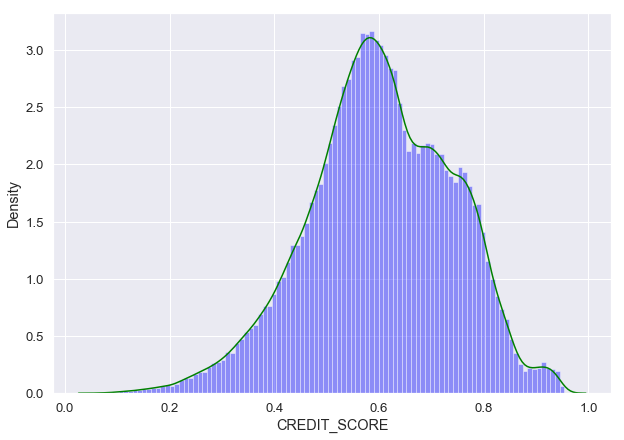

In [513]:
fig2 = sns.set(font_scale=1.2,
               style = 'darkgrid',
               rc={"figure.figsize": [10, 7]})
fig2 = sns.distplot(new_data["CREDIT_SCORE"],color='blue',kde_kws={'color':'green'},bins=100)
plt.show()

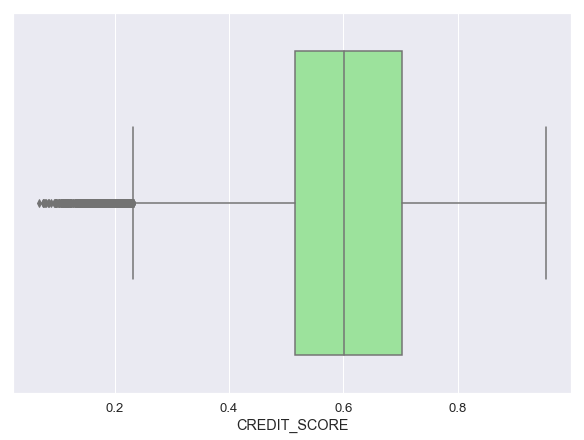

In [514]:
fig3 = sns.set(font_scale=1.2,
               style = 'darkgrid',
               rc={"figure.figsize": [10, 7]})
fig3 = sns.boxplot(new_data["CREDIT_SCORE"],color='lightgreen')
plt.show()

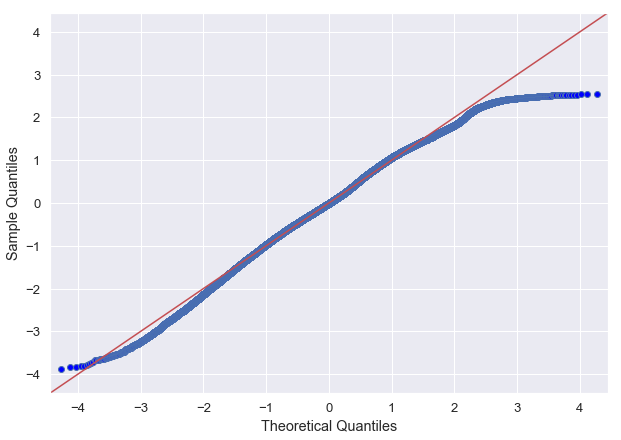

In [515]:
fig4 = sns.set(font_scale=1.2,
               style = 'darkgrid',
               rc={"figure.figsize": [10, 7]})
fig4 = sm.qqplot(new_data['CREDIT_SCORE'],line='45',fit=True,dist=stats.norm)
plt.show()

#### <div class="alert alert-info" ><font color=red>*Observations 📌*</font></div>
    1. Credit_score is not normally distributed which is evident from Histplot, QQ plot and little bit left skewed .
    2. Few Records are well out of range of normal range which could be termed as OUTLIERS as these records cannot be termed
    legit by any means possible.
    3. From the Domain Knowledge of Finance Field it is must that a credit score is not more than 950 and less than 250 so 
    we need to remove those records.
    4. None of the continuous features are highly correlated with the target variable i.e 'OUTCOME'.

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

In [516]:
print(f'\033[94mTotal number of features: {len(new_data.columns)}')
print(f'\033[94mNumber of categorical features: {len(categorical_features)}')
print(f'\033[94mNumber of continuous features: {len(continuous_features)}')

labels=['Categorical', 'Continuous']
values= [len(categorical_features), len(continuous_features)]
colors = ['#F0E68C', '#FF69B4']
pyo.init_notebook_mode()
fig7 = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0], marker=dict(colors=colors, 
                line=dict(color='#000000', 
                          width=1)))])
fig7.show()

Total number of features: 17
Number of categorical features: 14
Number of continuous features: 3


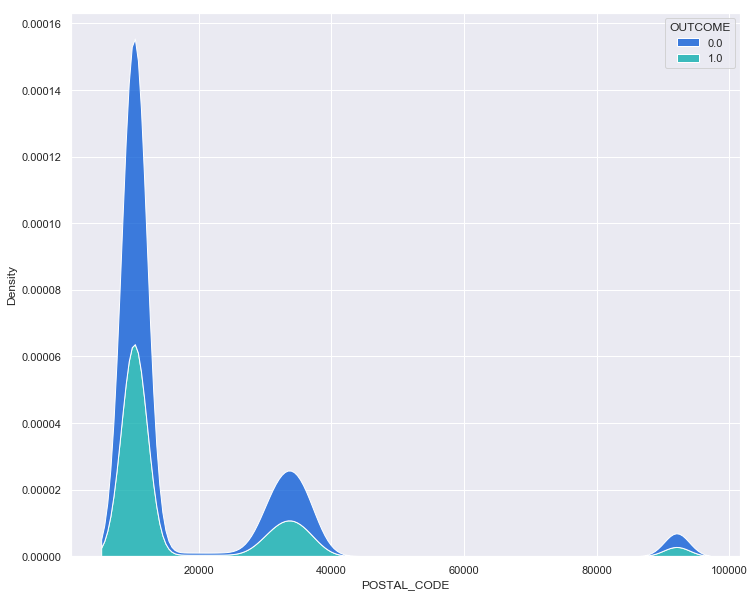

In [517]:
sns.set_theme(style='darkgrid',rc={"figure.figsize": [12, 10]})
sns.kdeplot(x = new_data['POSTAL_CODE'],hue = data['OUTCOME'],multiple='stack',palette='winter');

In [518]:
new_data['POSTAL_CODE'].mode()

0    10238
dtype: int64

In [519]:
new_data[new_data["POSTAL_CODE"].apply(lambda post: post == 10238)].head()

ID    AGE  GENDER DRIVING_EXPERIENCE    EDUCATION        INCOME  \
1  251762  26-39    male             20-29y  high school  middle class   
2  481952  40-64    male             20-29y         none  middle class   
5  695325  40-64  female             20-29y  high school   upper class   
7  702922  40-64  female               30y+   university   upper class   
8  481986  26-39    male             20-29y   university   upper class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
1      0.475741                1.0  before 2015      1.0       0.0   
2      0.839817                1.0  before 2015      1.0       1.0   
5      0.639052                1.0   after 2015      1.0       0.0   
7      0.752427                1.0  before 2015      1.0       0.0   
8      0.802496                1.0  before 2015      0.0       0.0   

   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
1        10238          9000.0                    0     0               0   
2        10238         12000.0                    0     0               0   
5        10238         17000.0                    0     0               0   
7        10238         12000.0                    1     1               0   
8        10238         11000.0                    0     0               0   

  TYPE_OF_VEHICLE  
1       HatchBack  
2           Sedan  
5             SUV  
7      Sports Car  
8      Sports Car

In [520]:
new_data[new_data["POSTAL_CODE"].apply(lambda post: post == 10238)].shape

(77608, 17)

#### <div class="alert alert-info" ><font color=red>*Observations 📌*</font></div>
    1. Dataset contains total of 18 features of which 3 are continuous variables and 14 are categorical variables.
    2. Almost 74% of customers are from 'POSTAL_CODE' i.e 10238 but that does not add any insights to our model.
    3. 'POSTAL_CODE' and 'ID' features are not relevant to the model building part and give no insights to future model.
 

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="3.3"></a>

## <font color=teal>EDA of Categorical Features</font> 

In [521]:
df_not_num = new_data[categorical_features]

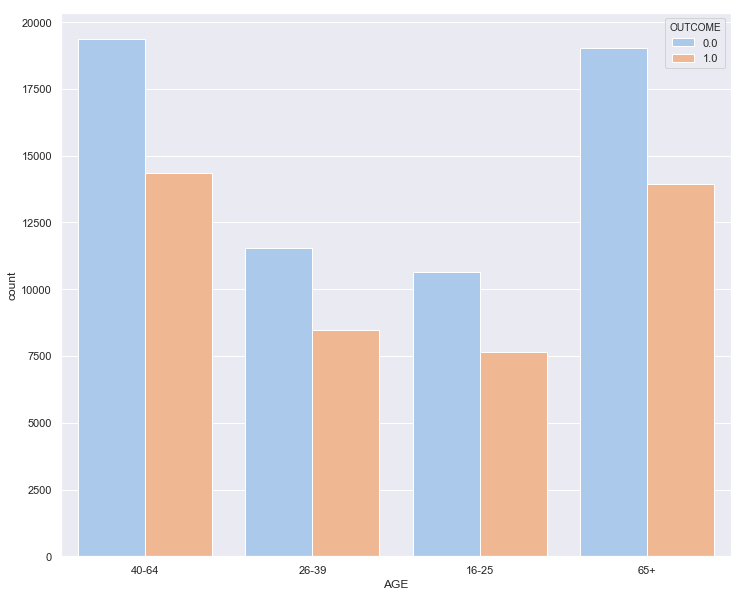

In [522]:
sns.set_theme(style='darkgrid',rc={"figure.figsize": [12, 10]})
sns.countplot(new_data['AGE'],hue=data['OUTCOME'],palette='pastel');

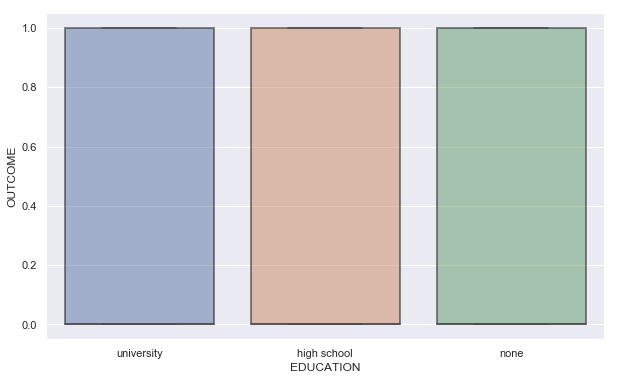

In [523]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x=new_data['EDUCATION'], y=data['OUTCOME'])
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.show()

In [524]:
new_data.groupby('GENDER')[['EDUCATION','DRIVING_EXPERIENCE','INCOME','AGE']].describe().T

GENDER                          female         male
EDUCATION          count         39683        65317
                   unique            3            3
                   top     high school  high school
                   freq          17579        29011
DRIVING_EXPERIENCE count         39683        65317
                   unique            4            4
                   top          20-29y       20-29y
                   freq          14100        23393
INCOME             count         39683        65317
                   unique            4            4
                   top     upper class  upper class
                   freq          19301        31970
AGE                count         39683        65317
                   unique            4            4
                   top             65+        40-64
                   freq          12622        21124

In [525]:
new_data.groupby('TYPE_OF_VEHICLE')[['DUIS','SPEEDING_VIOLATIONS']].describe().T

TYPE_OF_VEHICLE               HatchBack           SUV         Sedan  \
DUIS                count  24900.000000  17388.000000  28120.000000   
                    mean       0.127430      0.130262      0.130690   
                    std        0.585192      0.595122      0.588566   
                    min        0.000000      0.000000      0.000000   
                    25%        0.000000      0.000000      0.000000   
                    50%        0.000000      0.000000      0.000000   
                    75%        0.000000      0.000000      0.000000   
                    max        6.000000      6.000000      6.000000   
SPEEDING_VIOLATIONS count  24900.000000  17388.000000  28120.000000   
                    mean       0.663815      0.669887      0.684175   
                    std        1.361883      1.400424      1.403386   
                    min        0.000000      0.000000      0.000000   
                    25%        0.000000      0.000000      0.000000   
                    50%        0.000000      0.000000      0.000000   
                    75%        1.000000      1.000000      1.000000   
                    max       20.000000     19.000000     18.000000   

TYPE_OF_VEHICLE              Sports Car  
DUIS                count  34592.000000  
                    mean       0.130348  
                    std        0.591178  
                    min        0.000000  
                    25%        0.000000  
                    50%        0.000000  
                    75%        0.000000  
                    max        6.000000  
SPEEDING_VIOLATIONS count  34592.000000  
                    mean       0.680215  
                    std        1.374600  
                    min        0.000000  
                    25%        0.000000  
                    50%        0.000000  
                    75%        1.000000  
                    max       18.000000

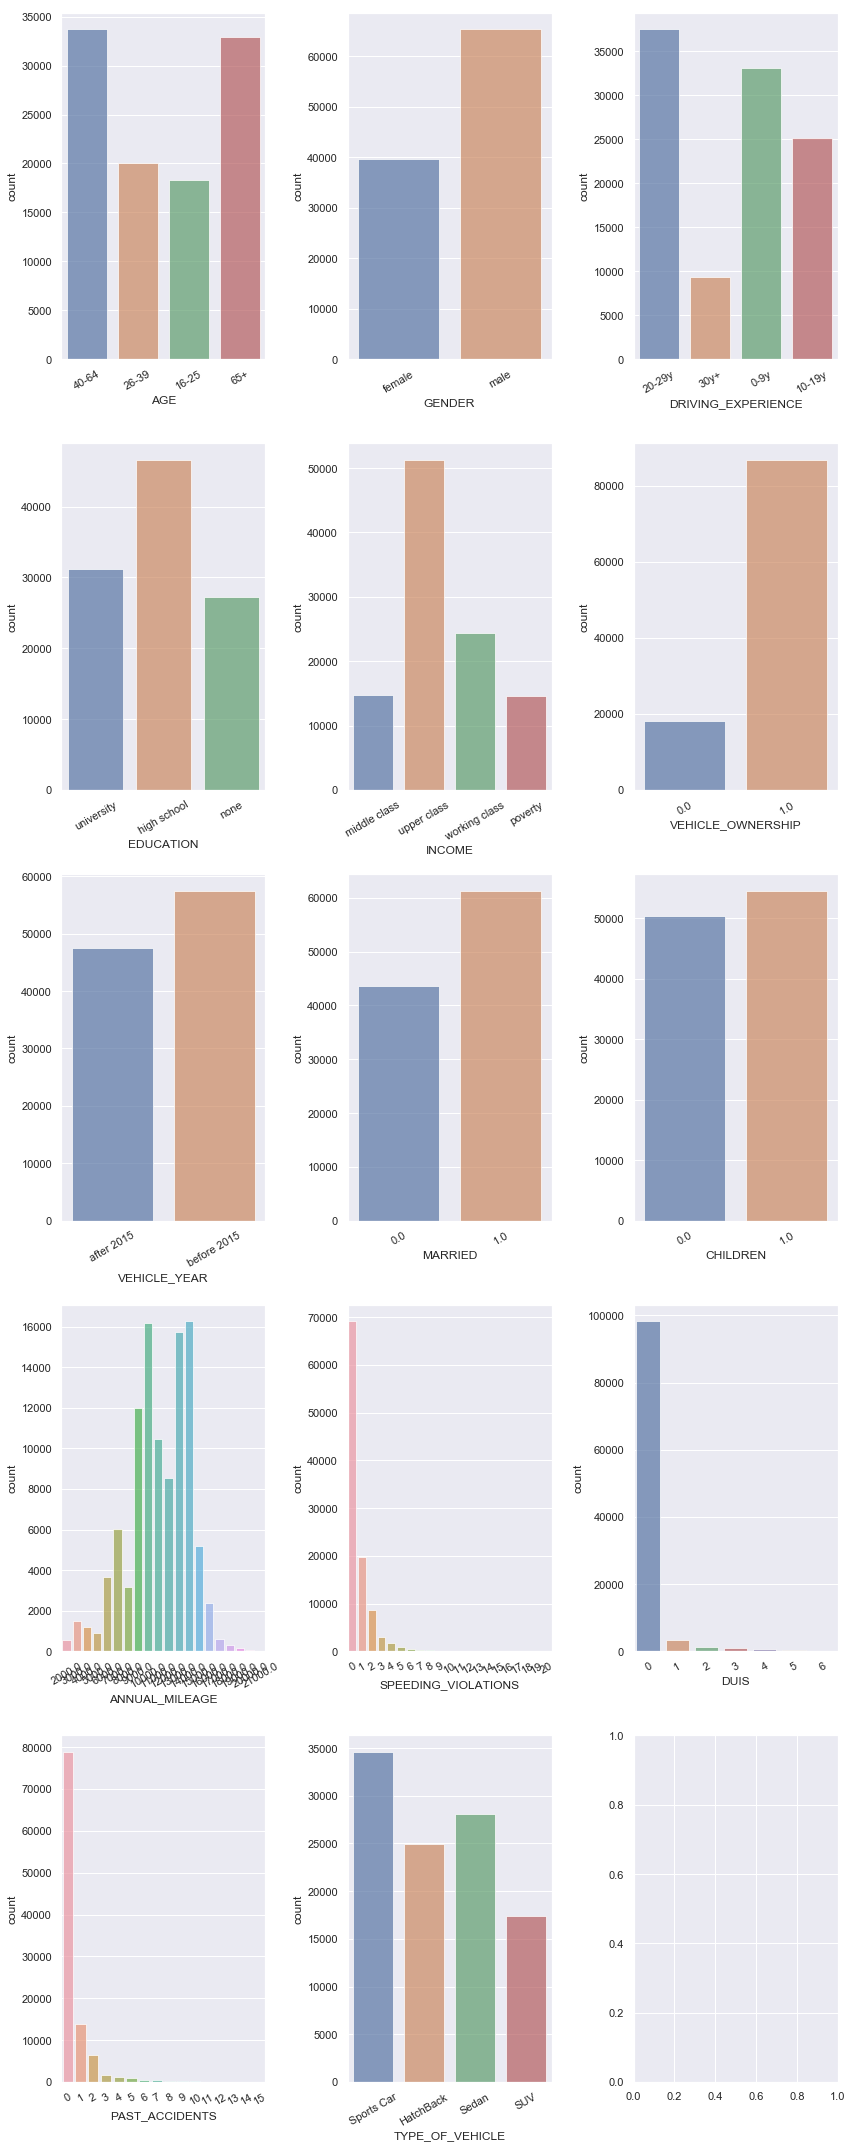

In [526]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=30)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="3.4"></a>
## <font color=teal>Interaction with Target Variable</font> 

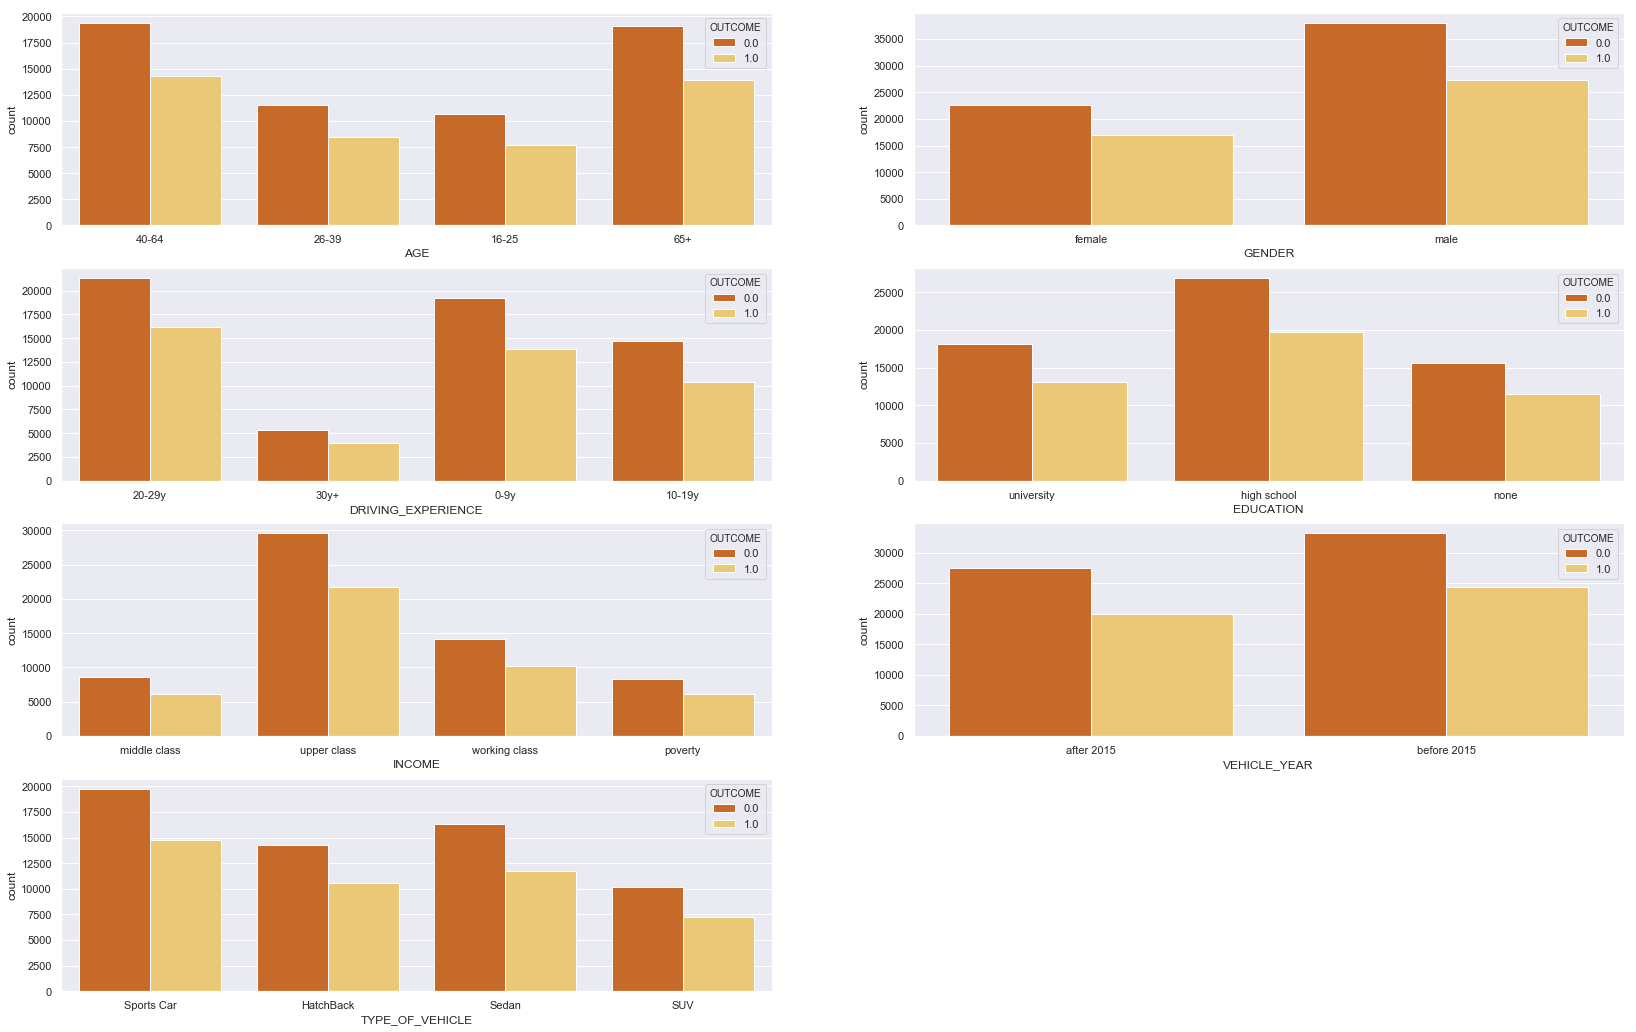

In [527]:
cols = 2
rows = 4
fig = plt.figure(figsize= (28,18))
all_cats = new_data.select_dtypes(include='object')
cat_cols = all_cats.columns[all_cats.nunique() < 25]
for i, col in enumerate(cat_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x=new_data[col], ax=ax,palette='YlOrBr_r',hue=data['OUTCOME'])
    
plt.show()

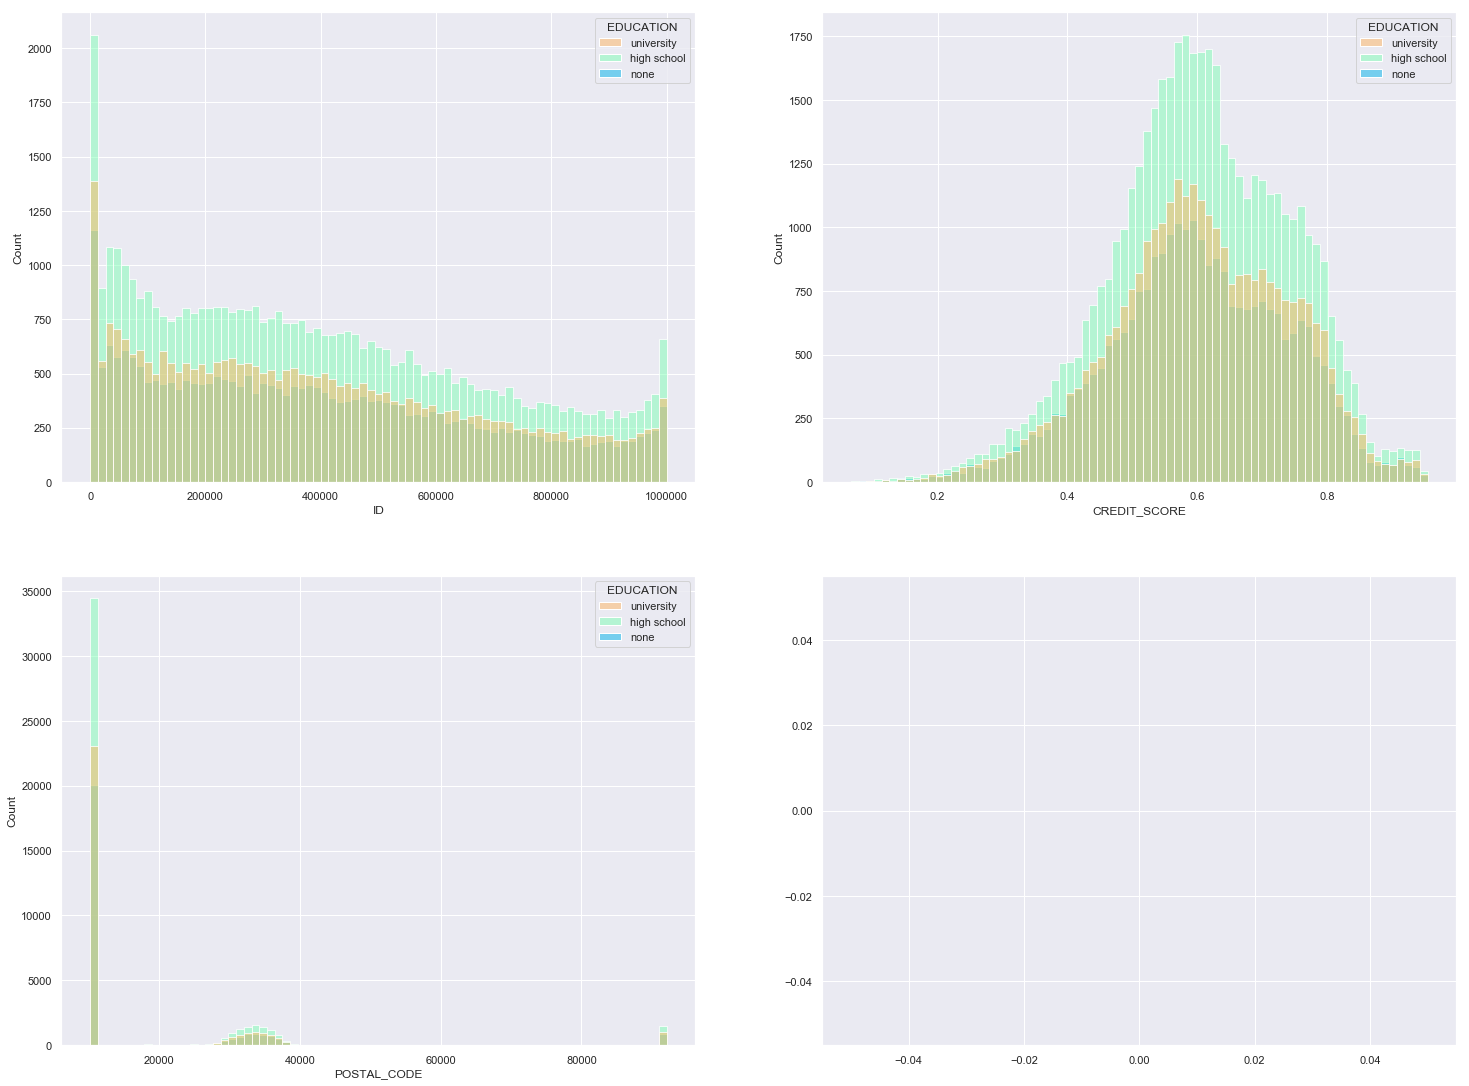

In [528]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(25,19))

for i,column in enumerate(continuous_features):
    q, mod = divmod(i, 2)
    sns.histplot(x=column, data=new_data,color='teal',bins=75,ax = axes[q][mod],hue='EDUCATION',palette='rainbow_r')
    
    #axes[q][mod].set_title(f'Distribution of {numerical_features[i]}',size=15)

# fig.suptitle('Blue: Transported=0, Red: Transported=1', fontsize=20)
#fig.tight_layout()    
plt.plot();

#### <div class="alert alert-info" ><font color=red>*Observations 📌*</font></div>
    1. The vast number of customers are from Age group of 40+ years.
    2. 'high_school' is the education background of most of females as well as males.
    3. Almost 50% of females and males are of 'upper_class' Income band.
    4. Around 30% of females are of 60+ yrs of Age Group with the highest count and with the highest count of around 33% 
       males are from 40-64yrs of Age Group.
    5. 'Sports_car' is the type of car which is mostly driven under DUIS and have most number of speeding violations.
    6. We do not require how many speeding violations a customer has rather we can binarize it and get insights from it. 

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="4"></a>
# <div class="alert alert-success" ><font color=orange>Data Preprocessing and Feature Engineering✅</font></div>

#### Removing irrelevant data which is the removal of all records which contains 'CREDIT_SCORE' smaller than 250 and higher than 950 using IQR and then rounding it to 3 digits.

In [529]:
first_percentile_q1 = data['CREDIT_SCORE'].quantile(0.25)
third_percentile_q3 = data['CREDIT_SCORE'].quantile(0.75)
iqr = third_percentile_q3 - first_percentile_q1

min_threshold_weight = first_percentile_q1 - 1.5 * iqr
max_threshold_weight = third_percentile_q3 + 1.5 * iqr

outliers = data[(data['CREDIT_SCORE']<min_threshold_weight)|(data['CREDIT_SCORE']>max_threshold_weight)]

In [530]:
outliers.head()

ID    AGE  GENDER DRIVING_EXPERIENCE    EDUCATION         INCOME  \
88   334926  26-39    male             20-29y  high school    upper class   
331   92337  40-64  female             20-29y         none    upper class   
394    2345  16-25  female               0-9y  high school    upper class   
794   70421    65+    male             20-29y   university        poverty   
837  170166    65+  female               30y+   university  working class   

     CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
88       0.142077                1.0   after 2015      1.0       1.0   
331      0.211753                1.0   after 2015      1.0       1.0   
394      0.209707                1.0  before 2015      1.0       1.0   
794      0.213951                1.0  before 2015      1.0       1.0   
837      0.146841                1.0   after 2015      1.0       0.0   

     POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
88         10238          7000.0                    0     0               1   
331        10238         14000.0                    0     0               0   
394        14368         15000.0                    0     0               2   
794        10238         10000.0                    1     3               2   
837        10238         14000.0                    0     0               1   

     OUTCOME TYPE_OF_VEHICLE  
88       0.0             SUV  
331      0.0      Sports Car  
394      1.0           Sedan  
794      1.0           Sedan  
837      0.0      Sports Car

In [531]:
new_outliers = data[data['CREDIT_SCORE'] > 0.95 ]

In [532]:
final_outliers = pd.concat([outliers,new_outliers])

In [533]:
final_outliers.shape

(727, 18)

In [534]:
data = data.drop(final_outliers.index,axis = 0)

In [535]:
data['CREDIT_SCORE'] = (data['CREDIT_SCORE'].round(3) * 1000).astype(int)

#### Binarizing 'DUIS', 'PAST_ACCIDENTS' and 'SPEEDING_VIOLATIONS' features cause if a person is found under DUI then it doesn't matter how many times that person has done it and can be easily be categorised as '1'( has been found under DUI ) and '0'( has never been found under DUI) same goes for 'PAST_ACCIDENTS' it does not matter if the accidents has happened once or more than once, simply if no accidents then assign '0' to and happened once or more than once then assign it '1'. Same strategy goes for 'SPEEDING_VIOLATIONS'.

In [536]:
data['DUIS'] = np.where(data['DUIS'] >= 1,1,0)

In [537]:
data['PAST_ACCIDENTS'] = np.where(data['PAST_ACCIDENTS'] >= 1,1,0)

In [538]:
data['SPEEDING_VIOLATIONS'] = np.where(data['SPEEDING_VIOLATIONS'] >= 1,1,0)

#### Reducing the categories of 'ANNUAL_MILEAGE' cause of more than 6 categories in it don't even have 10% of the value that the highest category has i.e 14000.0 has around 16k values and compared to 21000.0 which has around 2% of standing in the whole feature.

In [539]:
data['ANNUAL_MILEAGE'].value_counts()

14000.0    16146
10000.0    16101
13000.0    15618
9000.0     11913
11000.0    10396
12000.0     8510
7000.0      6006
15000.0     5158
6000.0      3627
8000.0      3133
16000.0     2354
3000.0      1512
4000.0      1171
5000.0       913
17000.0      614
2000.0       550
18000.0      312
19000.0      157
20000.0       77
21000.0        5
Name: ANNUAL_MILEAGE, dtype: int64

In [540]:
data['ANNUAL_MILEAGE'].mean()

11059.910043827262

In [541]:
index_values_mileage = data['ANNUAL_MILEAGE'].value_counts()[:16000.0].index

In [542]:
data['ANNUAL_MILEAGE'] = data['ANNUAL_MILEAGE'].where(data['ANNUAL_MILEAGE'].isin(index_values_mileage), 11000.0)

# Summing up all mileage values less than 10% from the top share i.e 14000.0 mileage and adding them to 'mean' value of the Annual_Mileage which came out to be nearly 11000.

In [543]:
data['ANNUAL_MILEAGE'] = data['ANNUAL_MILEAGE'].astype('int')

#### Converting 'POSTAL_CODE' to binary feature as majority of its value are from single postal code i.e '10238' and rest is very few so we club them together.

In [544]:
data['Is_POSTAL_CODE_10238'] = np.where(data['POSTAL_CODE'] == 10238,1,0)

In [545]:
data['Is_POSTAL_CODE_10238'].value_counts()

1    77104
0    27169
Name: Is_POSTAL_CODE_10238, dtype: int64

In [546]:
data.head()

ID    AGE  GENDER DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0  816393  40-64  female             20-29y   university   middle class   
1  251762  26-39    male             20-29y  high school   middle class   
2  481952  40-64    male             20-29y         none   middle class   
3    3506  40-64    male             20-29y  high school    upper class   
4  498013  40-64  female             20-29y         none  working class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
0           638                0.0   after 2015      0.0       0.0   
1           476                1.0  before 2015      1.0       0.0   
2           840                1.0  before 2015      1.0       1.0   
3           683                1.0  before 2015      0.0       1.0   
4           572                1.0   after 2015      1.0       1.0   

   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0        37379           11000                    0     0               0   
1        10238            9000                    0     0               0   
2        10238           12000                    0     0               0   
3        92099            6000                    1     0               0   
4        32122           15000                    0     0               1   

   OUTCOME TYPE_OF_VEHICLE  Is_POSTAL_CODE_10238  
0      0.0      Sports Car                     0  
1      1.0       HatchBack                     1  
2      1.0           Sedan                     1  
3      1.0           Sedan                     0  
4      0.0           Sedan                     0

#### Converting Nominal and Ordinal Variables to machine readable form i.e in digits by using One Hot Encoding and Label Encoding and removing irrelevant features that do not add any insights to our model.

In [548]:
# Nominal Variables

# AGE
# Gender
# Vehicle_Year


# Ordinal Variables

# Driving_Experience
# Education
# Income
# Type of Vehicle


nominal = ['AGE','GENDER','VEHICLE_YEAR','ANNUAL_MILEAGE']
ordinal = ['DRIVING_EXPERIENCE','EDUCATION','INCOME','TYPE_OF_VEHICLE']


def encoding(data):
    
    new_data = data.copy()
    
    ohe = OneHotEncoder(drop='if_binary',sparse=False)
    ohe.fit(new_data[nominal])
    
    new_data[ohe.get_feature_names(['AGE','GENDER','VEHICLE_YEAR','ANNUAL_MILEAGE'])] = pd.DataFrame(ohe.transform(new_data[nominal]))
    
    
    scale_driving_exp_mapper = {'0-9y': 0, '10-19y': 1, '20-29y': 2, '30y+': 3}
    scale_education_mapper = {'none': 0, 'high school': 1, 'university': 2}
    scale_income_mapper = {'poverty': 0, 'middle class': 1, 'working class': 2, 'upper class': 3}
    scale_vehicle_type_mapper = {'HatchBack': 0, 'Sedan': 1, 'SUV': 2, 'Sports Car': 3}
    
    new_data['DRIVING_EXPERIENCE'] = new_data['DRIVING_EXPERIENCE'].replace(scale_driving_exp_mapper)
    new_data['EDUCATION'] = new_data['EDUCATION'].replace(scale_education_mapper)
    new_data['INCOME'] = new_data['INCOME'].replace(scale_income_mapper)
    new_data['TYPE_OF_VEHICLE'] = new_data['TYPE_OF_VEHICLE'].replace(scale_vehicle_type_mapper)
    
    new_data = new_data.drop(['ID','POSTAL_CODE','AGE','GENDER','VEHICLE_YEAR','ANNUAL_MILEAGE'],axis=1)
    new_data = new_data.dropna(axis = 0)
    new_data = new_data.astype(int)
    
    return new_data

final_data = encoding(data)

In [549]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103551 entries, 0 to 104272
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   DRIVING_EXPERIENCE        103551 non-null  int32
 1   EDUCATION                 103551 non-null  int32
 2   INCOME                    103551 non-null  int32
 3   CREDIT_SCORE              103551 non-null  int32
 4   VEHICLE_OWNERSHIP         103551 non-null  int32
 5   MARRIED                   103551 non-null  int32
 6   CHILDREN                  103551 non-null  int32
 7   SPEEDING_VIOLATIONS       103551 non-null  int32
 8   DUIS                      103551 non-null  int32
 9   PAST_ACCIDENTS            103551 non-null  int32
 10  OUTCOME                   103551 non-null  int32
 11  TYPE_OF_VEHICLE           103551 non-null  int32
 12  Is_POSTAL_CODE_10238      103551 non-null  int32
 13  AGE_16-25                 103551 non-null  int32
 14  AGE_26-39           

In [550]:
final_data.shape

(103551, 30)

In [551]:
final_data.head()

DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP  \
0                   2          2       1           638                  0   
1                   2          1       1           476                  1   
2                   2          0       1           840                  1   
3                   2          1       3           683                  1   
4                   2          0       2           572                  1   

   MARRIED  CHILDREN  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  ...  \
0        0         0                    0     0               0  ...   
1        1         0                    0     0               0  ...   
2        1         1                    0     0               0  ...   
3        0         1                    1     0               0  ...   
4        1         1                    0     0               1  ...   

   ANNUAL_MILEAGE_7000  ANNUAL_MILEAGE_8000  ANNUAL_MILEAGE_9000  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   ANNUAL_MILEAGE_10000  ANNUAL_MILEAGE_11000  ANNUAL_MILEAGE_12000  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   ANNUAL_MILEAGE_13000  ANNUAL_MILEAGE_14000  ANNUAL_MILEAGE_15000  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     1   

   ANNUAL_MILEAGE_16000  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 30 columns]

#### <div class="alert alert-info" ><font color=red>*Observations 📌*</font></div>
    1. Converted all features to numerical values by using appropriate methods by using Domain Knowledge, OHE and 
       Label Encoding.
    2. Now our Dataset has 103k rows of data and number of columns are 29 after all preprocessing.

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="5"></a>
# <div class="alert alert-success" ><font color=orange>Correlation Matrix✅</font></div>

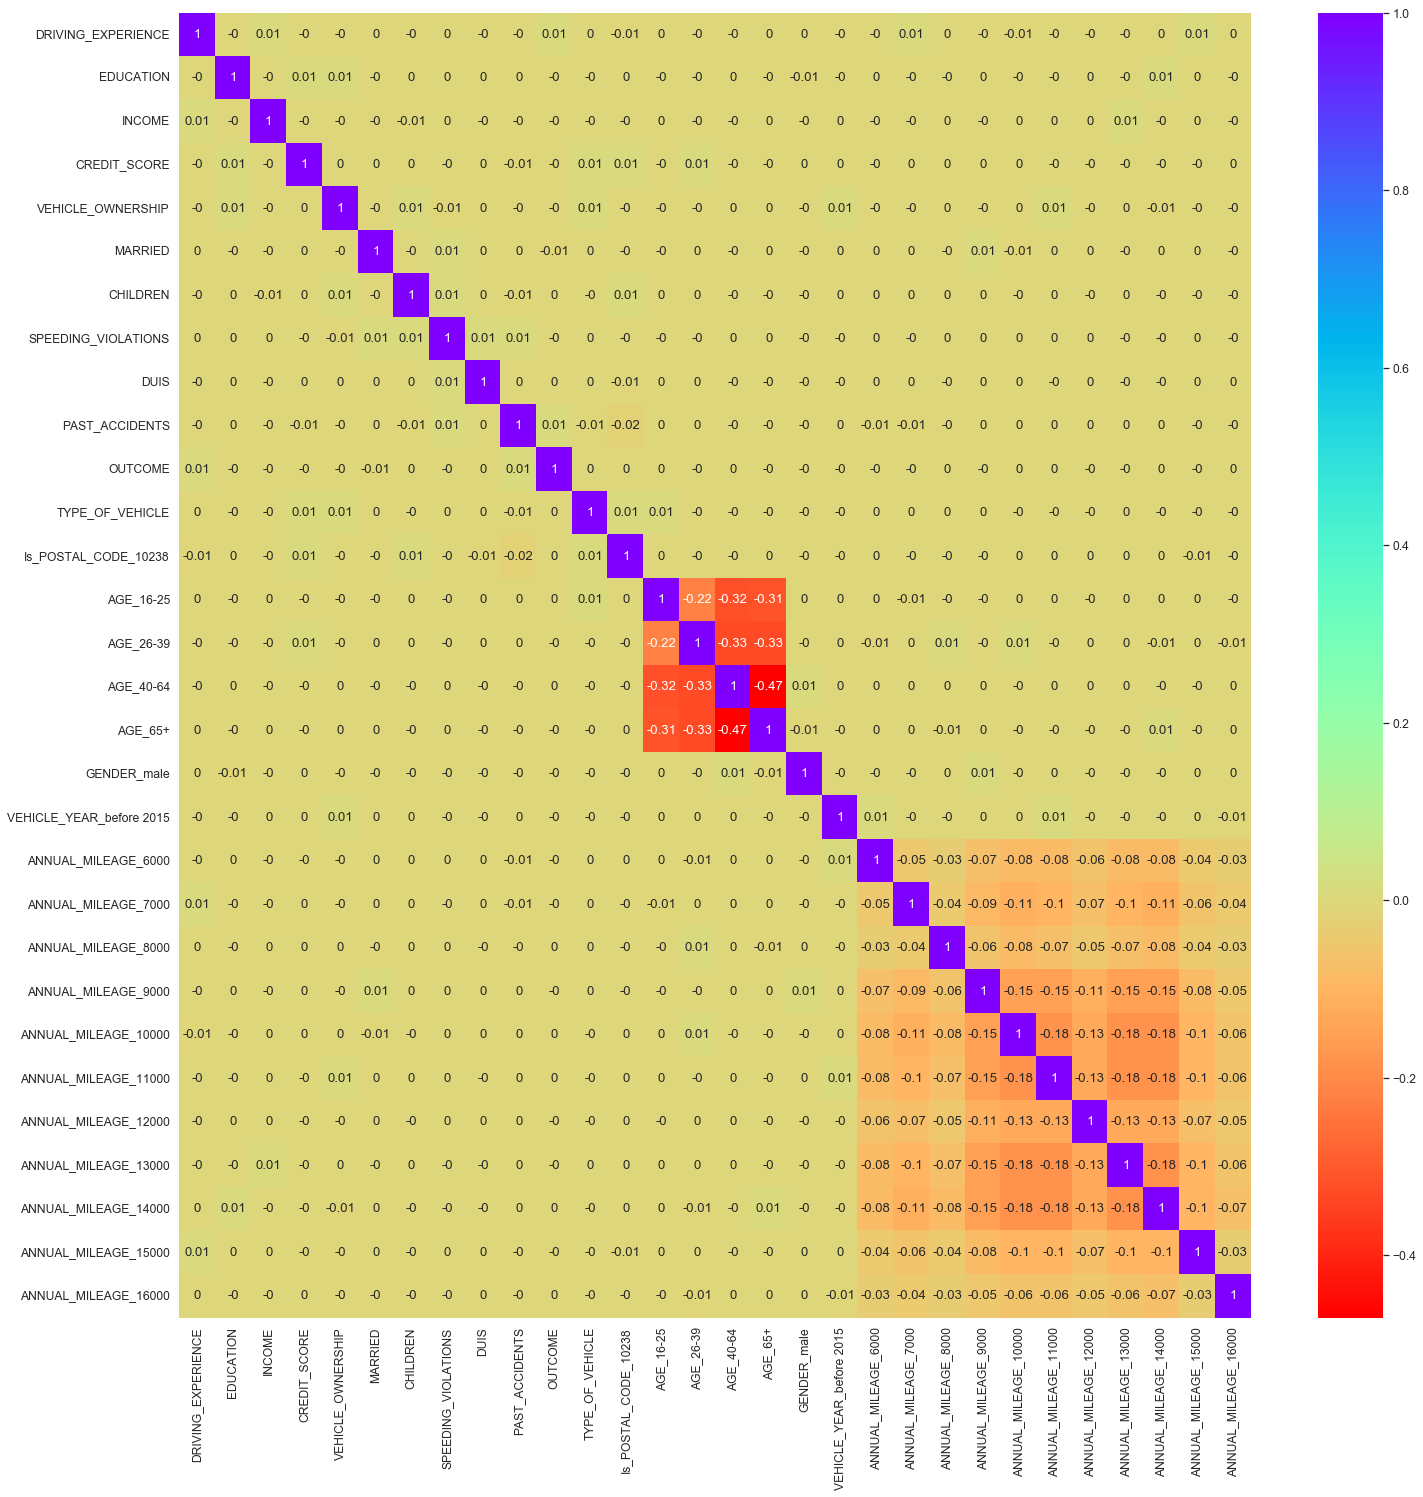

In [552]:
sns.set(font_scale=1.1,rc={"figure.figsize": [24, 24]})
sns.heatmap(final_data.corr().round(2),annot=True,cmap = 'rainbow_r');

It is clear from heatmap that the dataset does not contain high Multicollinearity.

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="6"></a>
# <div class="alert alert-success" ><font color=orange>Choosing Best Classifier for ML Model✅</font></div>

In [553]:
X = final_data.drop('OUTCOME',axis = 1)
y = final_data['OUTCOME']

In [556]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.32,random_state = 12)

In [567]:
classifiers = [LogisticRegression(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier()
             ,GradientBoostingClassifier(),XGBClassifier(eval_metric = 'logloss'),AdaBoostClassifier()]
t0 = time.time()

clf_dict = {0:'Logistic Regression',
            1:'KNN',
            2:'Naive Bayes(Gaussian)',
            3:'Decision Tree Classifier',
            4:'Random Forest',
            5:'Gradient Boost',
            6:'XGBoost Classifier',
            7:'Adaboost Classifier'}              
    
    
for i, model in enumerate(classifiers):
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_log_loss')
    print("%s CV SCORE(Log_Loss): %f , Standard Deviation: %f" % (clf_dict[i], cv_results.mean(), cv_results.std()))
t1 = time.time()
print()
print('Time Taken for running all classifier is: ', (t1 - t0).round(3), 's')

Logistic Regression CV SCORE(Log_Loss): -0.681533 , Standard Deviation: 0.000539
KNN CV SCORE(Log_Loss): -1.924017 , Standard Deviation: 0.017721
Naive Bayes(Gaussian) CV SCORE(Log_Loss): -0.688169 , Standard Deviation: 0.003384
Decision Tree Classifier CV SCORE(Log_Loss): -17.019706 , Standard Deviation: 0.088357
Random Forest CV SCORE(Log_Loss): -0.707837 , Standard Deviation: 0.001997
Gradient Boost CV SCORE(Log_Loss): -0.681657 , Standard Deviation: 0.000517
XGBoost Classifier CV SCORE(Log_Loss): -0.692036 , Standard Deviation: 0.000615
Adaboost Classifier CV SCORE(Log_Loss): -0.692671 , Standard Deviation: 0.000015
Time Taken for running all classifier is:  407.45366621017456 s


#### <div class="alert alert-info" ><font color=red>*Observations 📌*</font></div>
    1. After Analyzing these many classifier we would go ahead and choose "LOGISTIC REGRESSION" on which we would train 
       our model using the dataset provided.
    2. Next step in moving forward is HyperParameter Tuning which we would do using Optuna. 

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="7"></a>
# <div class="alert alert-success" ><font color=orange>Hyperparameter Tuning✅</font></div>

In [648]:
def objective(trial):
    C = trial.suggest_float('C',1e-4,1e-3)
    solver = trial.suggest_categorical('solver',['newton-cg', 'lbfgs', 'sag', 'saga'])
    max_iter = trial.suggest_int('max_iter',100,300,step = 50)
    warm_start = trial.suggest_categorical('warm_start',[True,False])

    clf = LogisticRegression(C=C,fit_intercept=fit_intercept,solver=solver,penalty='l2',max_iter=max_iter,
                            warm_start=warm_start)
    clf.fit(X_train,y_train)

    logloss = log_loss(y_true=y_test,y_pred=clf.predict_proba(X_test))
    
    return logloss


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)
trial = study.best_trial

[I 2023-01-28 01:16:35,160] A new study created in memory with name: no-name-03664aa8-7bd8-41ad-9ff2-6e30cbeff921
[I 2023-01-28 01:16:36,287] Trial 0 finished with value: 0.6810668218665922 and parameters: {'C': 0.00039779657081636874, 'fit_intercept': True, 'solver': 'lbfgs', 'max_iter': 300, 'warm_start': True}. Best is trial 0 with value: 0.6810668218665922.
[I 2023-01-28 01:16:43,775] Trial 1 finished with value: 0.6813167318126785 and parameters: {'C': 0.000278167583818472, 'fit_intercept': False, 'solver': 'saga', 'max_iter': 150, 'warm_start': True}. Best is trial 0 with value: 0.6810668218665922.
[I 2023-01-28 01:16:44,598] Trial 2 finished with value: 0.6812748082382917 and parameters: {'C': 0.0007042857851072856, 'fit_intercept': False, 'solver': 'newton-cg', 'max_iter': 200, 'warm_start': True}. Best is trial 0 with value: 0.6810668218665922.
[I 2023-01-28 01:16:45,850] Trial 3 finished with value: 0.6810033023090227 and parameters: {'C': 0.0007556698512653041, 'fit_intercep

#### <div class="alert alert-info" ><font color=red>*Observations 📌*</font></div>
        1. Log Loss doesn't decrease so going forward with best parameters.

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="8"></a>
# <div class="alert alert-success" ><font color=orange>Model Building and Model Dump✅</font></div>

In [660]:
logistic = LogisticRegression(C=0.000134,solver='newton-cg',max_iter=250,warm_start=True)
logistic.fit(X,y)
log_loss(y_true=y,y_pred=logistic.predict_proba(X))

0.681029102254214

In [ ]:
# Trial 16 finished with value: 0.6809686286074113 and parameters: {'C': 0.00013545704029983255, 'fit_intercept': True, 'solver': 'newton-cg', 'max_iter': 250, 'warm_start': True}. Best is trial 16 with value: 0.6809686286074113.

In [150]:
def predict_claim(credit_score,income,type_of_vehicle,education,driving_experience):
    
    x = np.zeros(len(X.columns))
    x[0] = credit_score
    x[1] = income
    x[2] = type_of_vehicle
    x[3] = education
    x[4] = driving_experience
        
    return logistic.predict([x])[0]


In [661]:
import pickle
with open('insurance_claim_model.pickle','wb') as f:
    pickle.dump(logistic,f)

In [662]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>